In [5]:
import tensorflow as tf # Imports the tensor flow library
tf.__version__

'1.12.0'

In [3]:
message = tf.constant('Welcome to the exciting world of Deep Neural Networks!') 

Since the message we want to print is a constant string, we use tf.constant:

To execute the graph element, we need to define the **Session** using **with** and **run** the session using run:

In [19]:
with tf.Session() as sess:
     print(sess.run(message).decode()) # with decode

session = tf.Session()
print(session.run(message))# with out decode

Welcome to the exciting world of Deep Neural Networks!
b'Welcome to the exciting world of Deep Neural Networks!'


In [6]:
mnist = tf.keras.datasets.mnist # 28 x 28 images of handwritten digits 0-9

In [7]:
(X_train, y_train),(X_test,y_test) = mnist.load_data() # loading the mnist data

11493376/11490434 [==============================] - 1s 0us/step


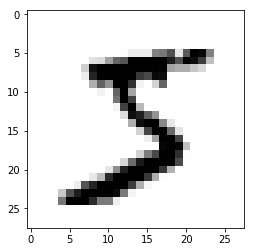

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [12]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()
print(X_train[0])

Pixel data is varying from 0 to 255 and it is better to normalize the pixel data using tf normalize option

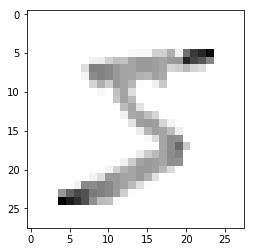

In [14]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()

Model building using keras sequential type of model and there are three types of models in keras API

**The Sequential Model**
    - Dead simple
    - Only for single-input, single-output, sequential layer stacks
    - Good for 70+% of use cases
**The functional API**
    - Like playing with Lego bricks
    - Multi-input, multi-output, arbitrary static graph topologies
    - Good for 95% of use cases
**Model subclassing**
    - Maximum flexibility
    - Larger potential error surface

In [20]:
model = tf.keras.models.Sequential()


MNIST images are like 28 X 28 multi dimensional array. But, we want them to be a flatten (single column),which can be achieved either by using numpy,reshape or we can use one of the layers that's built into keras which is flattened

In [22]:
model.add(tf.keras.layers.Flatten()) # Input layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # Hidden layer 1
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # Hidden layer 2
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) # Output layer

*model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))*
- It defines a hidden layer with 128 neurons/units, connected to the input layer or previous hidden layer that use relu activation function.

*model.add(Dense(128, input_dim=8, init='uniform', activation='relu'))*
- It defines the input layer as having 8 units
- It defines a hidden layer with 128 neurons/units, connected to the input layer that use relu activation function.
- It initializes all weights using a sample of unfirom random numbers

Now that the model is defined, we can compile it.

When compiling, we must specify some additional properties required when training the network. 

- Must specify the loss function to evaluate the weights
- Must specify the optimizer, which will do search through different weights for the network
- Optional metrics, would like to collect & report during training

*Remember training a network means finding the best set of weights to make predictions for this problem.*

In this case, we will use logarithmic loss, which for a Multi classification problem. For this example, we are considering “sparse_categorical_crossentropy“ as loss parameter. We will also use the efficient gradient descent algorithm “adam” for no other reason that it is an efficient default. Learn more about the Adam optimization algorithm in the paper [“Adam: A Method for Stochastic Optimization“.](http://arxiv.org/abs/1412.6980)

In [23]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

We have defined our model and compiled it ready for computation. Now it is time to fit the model on mnist data

- We can train or fit our model on our loaded data by calling the **fit()** function on the model.

The training process will run for a fixed number of iterations through the dataset called **epochs**, that we must specify using the **nepochs** argument. We can also set the number of instances that are evaluated before a weight update in the network is performed, called the **batch size** and set using the **batch_size** argument.

- Epoch is just a "full pass" through your entire training dataset. 3 epochs means it passed over your data set 3 times

In [24]:
model.fit(X_train,y_train,epochs = 50, batch_size = 10)

Epoch 1/50
60000/60000 [==============================] - 13s 209us/step - loss: 0.2176 - acc: 0.9348
Epoch 2/50
60000/60000 [==============================] - 12s 199us/step - loss: 0.0969 - acc: 0.9694
Epoch 3/50
60000/60000 [==============================] - 12s 202us/step - loss: 0.0685 - acc: 0.9783
Epoch 4/50
60000/60000 [==============================] - 12s 201us/step - loss: 0.0521 - acc: 0.9833
Epoch 5/50
60000/60000 [==============================] - 12s 201us/step - loss: 0.0407 - acc: 0.9865
Epoch 6/50
60000/60000 [==============================] - 12s 201us/step - loss: 0.0330 - acc: 0.98900s - loss: 0.0329 - acc
Epoch 7/50
60000/60000 [==============================] - 12s 200us/step - loss: 0.0272 - acc: 0.9911
Epoch 8/50
60000/60000 [==============================] - 12s 195us/step - loss: 0.0236 - acc: 0.9919
Epoch 9/50
60000/60000 [==============================] - 12s 193us/step - loss: 0.0199 - acc: 0.9932
Epoch 10/50
60000/60000 [==============================] - 

We have trained our neural network on the train dataset and we can evaluate the performance of the network on the test dataset.

In [25]:
val_loss, val_acc = model.evaluate(X_test,y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 40us/step
0.2571990268678714 0.9755


In [30]:
# Save the current model and load the model 

# model.save('number_reader_model')
# new_model = tf.keras.models.load_model('number_reader_model')
predictions = model.predict([X_test])   #predict always takes a list
print(predictions)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 4.7248140e-33]
 [0.0000000e+00 1.0149464e-29 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 2.2066167e-33 ... 4.9846245e-29
  3.1889327e-24 3.8095756e-28]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  2.0714089e-31 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [31]:
import numpy as np
print(np.argmax(predictions[0]))

7


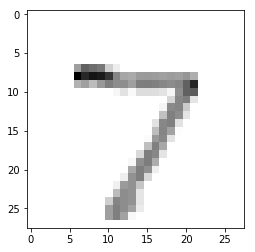

In [34]:
plt.imshow(X_test[0], cmap = plt.cm.binary)
plt.show()